## Simulating Credit Rating Migration and Capital Impact under Stress Scenarios: A Markov Model Approach

## 1. Introduction and Project Overview

This project builds a simulated framework to evaluate credit rating migration and its regulatory capital impact under both baseline and stress scenarios. The simulation is powered by a discrete-time Markov process, modeling a portfolio of 500 companies over a 10-year horizon.

Rather than relying on historical credit data, the project focuses on synthetic rating paths generated from assumed transition matrices, representing both stable and deteriorating economic conditions. The stress matrix is calibrated to reflect macroeconomic downturns, where downgrade and default probabilities are significantly amplified.

### Objectives:
- Evaluate the impact of adverse credit migration on downgrade and default patterns.
- Estimate Basel-style regulatory capital demand across time.
- Assess sensitivity of capital demand to changes in regulatory risk weights (RW).

### Key Features:
- Construction of baseline and stress credit rating transition matrices.
- Simulation of rating migration paths across 10 years.
- Capital requirement estimation using the Basel III-style formula:  
  **Capital = EAD × Risk Weight × Capital Ratio**
- Sensitivity analysis on RW parameters to evaluate policy implications.

This analysis aims to capture how credit quality deterioration, under macro-stress conditions, can translate into amplified regulatory capital demand, revealing important insights into systemic risk and capital adequacy planning.


## 2. Methodology

### 2.1 Transition Matrix Construction

We construct a discrete-time credit rating transition matrix `P_base` based on hypothetical assumptions. The matrix captures the annual probability of a company migrating from one credit rating to another. It consists of 8 rating states:

> AAA, AA, A, BBB, BB, B, CCC, D

The default state (D) is modeled as an absorbing state, meaning once entered, the firm cannot exit. Each row of the matrix represents a probability distribution conditioned on the firm's current rating and sums to 1.

We assume that firms are more likely to retain their current rating or migrate to adjacent states than to experience drastic jumps, in line with empirical credit behavior observed in practice.

### 2.2 Simulated Rating Path Generation

Using the transition matrix, we simulate the annual credit rating evolution of 500 firms over a 10-year horizon. The initial rating distribution is also assumed (hypothetical), assigning realistic proportions across rating categories (e.g., higher weight to A and BBB).

Each firm starts with an initial rating drawn from this distribution. For each subsequent year, the next rating is determined by randomly sampling from the corresponding row of the transition matrix based on the current rating.

This process produces a matrix of simulated rating paths, where each row corresponds to a firm and each column to a year:

```text
C1: A → A → BBB → BB → ...
C2: BBB → BB → D → D → ...
```

These paths represent realizations of a Markov process. The simulation is implemented using np.random.choice(), making it a Monte Carlo-style approach. This allows us to extract empirical quantities such as:

- Annual rating distributions

- Downgrade and default rates

- Capital requirements over time

The simulation-based methodology provides flexibility for stress testing and policy sensitivity analysis in later sections.

## 3. Rating Migration Stress Scenario

### 3.1 Transition Matrix under Stress

To evaluate the potential impact of macroeconomic downturns, we construct a stressed transition matrix, denoted as `P_stress`.

This matrix shares the same structure as the baseline matrix but incorporates heuristic adjustments to reflect adverse credit conditions.

The design of this stress scenario is inspired by regulatory frameworks such as the Federal Reserve's CCAR stress testing, where downgrade and default probabilities increase, while upgrade and stable probabilities are reduced.

The adjusted transition matrix preserves **row stochasticity** (each row sums to 1) and maintains the **discrete-time Markov property**.

These stress adjustments provide a **plausible and interpretable way** to model a deteriorating credit environment and support scenario-based capital assessment.

---

### 3.2 Rating Distribution and Default Rate under Stress

Using the same simulation methodology as in Section 2.2, we generate rating paths under the `P_stress` matrix for a 10-year horizon with 500 firms.

The **initial rating distribution remains unchanged**, allowing for a clean and consistent comparison with the baseline scenario.

We compute:

- The empirical transition matrix under stress,
- Annual downgrade rates,
- Annual default rates (share of firms reaching rating *D* each year).

These outputs are compared directly with the baseline case to assess how credit deterioration affects the portfolio’s **rating quality** and **default risk** over time.


### 3.3 Comparative Analysis of Rating Outcomes

The base and stress analyses are conducted using an identical simulation framework over a 10-year horizon. The only distinction lies in the construction of the transition matrix, where the stress matrix incorporates increased downgrade and default probabilities to simulate adverse conditions.

This comparison focuses on four key outputs:

1. **Yearly downgrade rates** from Year 2 to Year 10, based on transitions from Year *t–1* to Year *t*.
2. **Annual rating distributions**, capturing the evolving credit quality across all rating categories.
3. **Annual default rate**, measuring the percentage of firms newly entering the default state *(D)* each year.
4. **Cumulative default share**, indicating the total proportion of firms that have defaulted up to each year.

**Key Observations:**

- Under the stress scenario, downgrade rates are consistently higher, and the proportion of firms in lower credit categories (e.g., CCC and D) increases significantly relative to the baseline.
- Despite magnitude differences, both scenarios exhibit a similar **temporal pattern** in downgrade rates—**rising and falling in tandem**—suggesting that the **underlying transition dynamics** remain structurally consistent.
- The **divergence in default percentages becomes more pronounced** over time, with the stressed portfolio exhibiting **accelerated credit deterioration** and a substantially higher cumulative default share by Year 10.

These results highlight the **compounding effects of credit shocks** over long horizons and underscore the importance of stress testing for **forward-looking risk assessment and capital planning**.


### Section 4. Capital Requirement and Risk Weights under Basel III

### 4.1 Capital Requirement Assumptions under Basel III
Under the Basel III regulatory framework, banks are required to maintain a minimum level of capital relative to their risk-weighted assets(RWA) to ensure financial stability and absorb potential losses. The total capital requirement comprises both **core capital components** and **buffer layers**, which vary depending on macroeconomic conditions and bank-specific factors.

### Basel III Capital Structure

| Capital Component         | Requirement | Description                                                             |
|--------------------------|-------------|-------------------------------------------------------------------------|
| Common Equity Tier 1 (CET1) | 4.5%       | Core equity capital such as common shares and retained earnings         |
| Additional Tier 1 (AT1)     | 1.5%       | Perpetual subordinated instruments (e.g., contingent convertibles)      |
| Tier 2 Capital              | 2.0%       | Subordinated debt and other lower-quality capital instruments           |
| **Total Capital**           | **8.0%**   | The regulatory minimum (CET1 + AT1 + Tier 2)                            |

In addition to the 8% minimum, Basel III requires a **Capital Conservation Buffer(CCB)** of **2.5%**, intended to ensure that banks build up capital buffers during normal times which can be drawn down during periods of stress. When the buffer is breached, restrictions apply to dividend distributions, share buybacks and discretionary bonus payments.

### Effective Capital Ratio in this project:


$$
\text{Capital Ratio} = 8\% \ (\text{Minimum Capital}) + 2.5\% \ (\text{Capital Conservation Buffer}) = \boxed{10.5\%}
$$

- **Minimum Capital**: Required regulatory capital under Pillar 1.
- **Capital Conservation Buffer (CCB)**: An additional 2.5% CET1 capital to be held in normal times, designed to absorb losses during periods of financial and economic stress. If the buffer is not met, banks face constraints on dividends and bonuses.

### Risk Weight Mapping by Credit Rating

Under the standardized approach of Basel III, external credit ratings can be used to determine applicable risk weights. For simplicity, we adopt the following hypothetical mapping between credit ratings and risk weights:

| Credit Rating | Risk Weight |
|---------------|-------------|
| AAA           | 20%         |
| AA            | 30%         |
| A             | 50%         |
| BBB           | 75%         |
| BB            | 100%        |
| B             | 150%        |
| CCC           | 200%        |
| D             | 250%        |

> *Note: These weights are illustrative and loosely based on Basel III guidelines under the standardized approach. Actual risk weights may vary depending on counterparty type, maturity, and jurisdictional implementation.*

### Capital Requirement Formula

The capital required under Basel III is computed as:


$$
\text{Capital} = \text{EAD} \times \text{Risk Weight} \times \text{Capital Ratio}
$$



- **EAD (Exposure at Default)** is assumed to be 100 per firm, serving as a stylized and scalable estimation.
- **Risk Weights** are assigned based on simulated credit ratings, using a simplified mapping inspired by the Basel III standardized approach for corporate exposures.
- **Capital Ratio** is fixed at *10.5%*, which includes the 8% minimum capital requirement and the 2.5% capital conservation buffer recommended by Basel III.

This approach allows us to estimate and compare **aggregate capital needs** over time under different credit conditions and stress scenarios.

> **References**
> 
> - Basel Committee on Banking Supervision. *Basel III: A global regulatory framework for more resilient banks and banking systems*. Bank for International Settlements, 2011. [Link](https://www.bis.org/publ/bcbs189.htm)
> 
> - Basel Committee on Banking Supervision. *Basel Framework: Credit Risk – Standardised Approach (CRE20)*. [Link](https://www.bis.org/basel_framework/chapter/CRE/20.htm)

### 4.2 Capital Requirement Simulation Results

Using the assumptions detailed in Section 4.1, we compute the estimated capital requirement over a 10-year horizon for both baseline and stress scenarios.

The formula used is:

$$
\text{Capital} = \text{EAD} \times \text{Risk\ Weight} \times \text{Capital\ Ratio}
$$

where:
- $\text{EAD}$ is fixed at 100 per firm,
- $\text{Risk Weight}$ depends on annual simulated credit rating,
- $\text{Capital Ratio}$ is 10.5%, reflecting Basel III standards.

The total capital requirement is computed annually by aggregating across all firms. Results show that:

- The **stress scenario consistently requires more capital** than the baseline, reflecting higher downgrade and default risks.
- The divergence becomes **more pronounced over time**, highlighting **compounding risk exposure** under adverse conditions.
- These results demonstrate the utility of simulation-based stress testing for capital adequacy assessment.



### 4.3 Stress Sensitivity to Risk Weight Inputs

To assess the impact of regulatory assumptions on capital requirements, we conduct a sensitivity analysis by applying stress factors to the **risk weight (RW)** inputs used in the capital calculation formula:

$$
\text{Capital} = \text{EAD} \times \text{Risk Weight} \times \text{Capital Ratio}
$$

While the baseline scenario uses standardized RW values based on Basel III guidelines, this analysis multiplies each RW by a factor of **1.1** and **1.2**, representing moderate and severe regulatory stress scenarios, respectively.

> For example, the RW for a firm rated BBB increases from 0.75 to 0.825 (10% stress) and 0.90 (20% stress), directly raising the required capital.

The simulation paths and default profiles remain unchanged—only the risk weights are adjusted. This isolates the **pure capital sensitivity** to regulatory risk weight assumptions, independent of stochastic credit migration dynamics.

#### Key Observations

- Capital requirements rise proportionally with the stress multipliers, reflecting the linear nature of the capital calculation formula.
- This analysis mirrors regulatory stress testing practices where supervisors may increase risk weights to reflect heightened systemic concerns or perceived undercapitalization.
- Firms concentrated in lower-rated exposures (e.g., BB, B, CCC) are more sensitive to RW shocks due to their inherently higher baseline weights.

This stress-to-RW analysis enhances the forward-looking robustness of capital planning and supports the case for conservative buffers under potential regulatory revisions.



## 5. Conclusion and Policy Implications

Our simulation results confirm that credit conditions deteriorate significantly under stress, leading to elevated downgrade and default rates or higher regulatory capital requirements. These outcomes support the use of rating-based transition models as practical tools for long-term portfolio credit risk assessment.

From regulatory perspective, this framework highlights several key implications:

- **Forward-looking planning**: Stress-based rating simulations reveal the compounding effect of credit deterioration and emphasize the value of long-horizon capital planning in regulatory frameworks.

- **Calibration of risk weights**: Sensitivity testing shows that even modest increases in RW assumptions can substantially raise total capital requirements. This reinforces the need for prudence in RW calibration, especially in stress scenarios.

- **Scenario transparency**: Constructing interpretable stress matrices provides clarity for regulators and internal stakeholders on how adverse environments affect portfolio risk profiles.

- **Basel III implementation**: The simplified structure used in this project offers a practical example of translating Basel III capital logic into actionable portfolio analysis, and could be extended to include counterparty or market risk factors.

**Future work** could extend this framework by incorporating macroeconomic scenario forecasting alongside rating migration, or by integrating more granular exposure segmentation across industries, geographies, or counterparty types to enhance portfolio-level capital sensitivity analysis.

### Appendix：

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Define rating categories and transition matrix (P_base)
ratings = ["AAA", "AA", "A", "BBB", "BB", "B", "CCC", "D"]
n_ratings = len(ratings)

# Define a simplified base transition matrix (each row sums to 1)
P_base = np.array([
#AAA
    [0.900, 0.070, 0.020, 0.005, 0.003, 0.001, 0.0005, 0.0005],  
#AA  
    [0.010, 0.880, 0.080, 0.015, 0.010, 0.003, 0.0010, 0.0010], 
#A   
    [0.005, 0.010, 0.850, 0.090, 0.025, 0.010, 0.0050, 0.0050],  
#BBB 
    [0.001, 0.005, 0.030, 0.820, 0.080, 0.040, 0.0200, 0.0040],  
#BB 
    [0.0005, 0.002, 0.010, 0.040, 0.780, 0.090, 0.0500, 0.0275],  
#B   
    [0.000, 0.005, 0.008, 0.020, 0.060, 0.750, 0.0800, 0.0770],  
#CCC
    [0.0004, 0.0006, 0.002, 0.010, 0.030, 0.050, 0.7000, 0.2070],  
#D  
    [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.0000, 1.0000]                            # D (absorbing state)
])

# Number of companies and years
n_companies = 500
n_years = 10

# Initial rating distribution for n companies: start mostly with A and BBB
initial_distribution = np.array([0.01, 0.05, 0.30, 0.35, 0.15, 0.10, 0.04, 0.0])
initial_ratings = np.random.choice(ratings, size=n_companies, p=initial_distribution)

# Simulate rating paths
def simulate_rating_paths(P_matrix, ratings, initial_distribution, n_companies, n_years, seed=42):
    np.random.seed(seed)
    initial_ratings = np.random.choice(ratings, size=n_companies, p=initial_distribution)
    rating_paths = []

    for i in range(n_companies):
        company_id = f"C{i+1}"
        current_rating = initial_ratings[i]
        path = [current_rating]
        for _ in range(n_years - 1):
            current_idx = ratings.index(current_rating)
            next_rating = np.random.choice(ratings, p=P_matrix[current_idx])
            path.append(next_rating)
            current_rating = next_rating
        rating_paths.append([company_id] + path)

    columns = ["Company"] + [f"Year_{i+1}" for i in range(n_years)]
    return pd.DataFrame(rating_paths, columns=columns)



In [3]:
def calculate_empirical_transition_probs(rating_df, ratings):
    n_ratings = len(ratings)
    transition_counts = np.zeros((n_ratings, n_ratings))

 
    for _, row in rating_df.iterrows():
        for t in range(1, len(row) - 1):  # Year_1 to Year_{n-1}
            from_rating = row[t]
            to_rating = row[t + 1]
            i = ratings.index(from_rating)
            j = ratings.index(to_rating)
            transition_counts[i, j] += 1


    row_sums = transition_counts.sum(axis=1, keepdims=True)
    transition_probs = transition_counts / np.where(row_sums == 0, 1, row_sums)

    return pd.DataFrame(transition_probs, index=ratings, columns=ratings)

In [4]:
rating_df = simulate_rating_paths(P_base, ratings, initial_distribution, 500, 10)

In [5]:
transition_probs=calculate_empirical_transition_probs(rating_df, ratings)

C:\Users\74596\AppData\Local\Temp\ipykernel_37652\3600142499.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  from_rating = row[t]
C:\Users\74596\AppData\Local\Temp\ipykernel_37652\3600142499.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  to_rating = row[t + 1]


In [6]:
transition_probs

,AAA,AA,A,BBB,BB,B,CCC,D
AAA,0.930233,0.046512,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000
AA,0.012448,0.883817,0.074689,0.024896,0.004149,0.000000,0.000000,0.000000
A,0.002049,0.012295,0.854508,0.082992,0.028689,0.009221,0.002049,0.008197
BBB,0.001661,0.002492,0.029900,0.830565,0.072259,0.039867,0.019103,0.004153
BB,0.000000,0.000000,0.014815,0.034074,0.777778,0.087407,0.059259,0.026667
B,0.000000,0.009174,0.005505,0.018349,0.051376,0.766972,0.069725,0.078899
CCC,0.000000,0.000000,0.003356,0.013423,0.046980,0.073826,0.681208,0.181208
D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


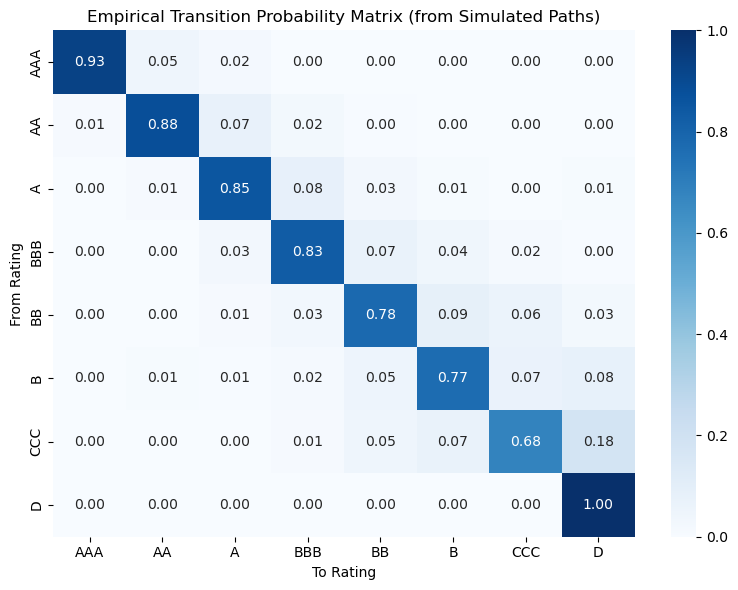

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(transition_probs, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Empirical Transition Probability Matrix (from Simulated Paths)")
plt.xlabel("To Rating")
plt.ylabel("From Rating")
plt.tight_layout()
plt.show()

In [8]:
###Stress Scenario

def apply_stress_to_base(P_base, stress_level=0.3):
    """
    Generate a stressed transition matrix based on a given base transition matrix.
    This simulates higher downgrade and default probabilities, lower upgrades,
    and moderate shrinkage of diagonal (rating staying unchanged).


    Parameters:
        P_base (np.array): Base transition matrix of shape (N, N) (e.g., AAA to D)
        stress_level (float): Intensity of stress, e.g., 0.3 = +30% downgrade adjustment

    Returns:
        P_stress (np.array): Adjusted stress scenario matrix of same shape
    """
    P_stress = P_base.copy()
    n = P_base.shape[0]  # Number of rating grades, e.g., 8

    for i in range(n):
        row = P_base[i].copy()

        # Downgrade: transition to lower grades (i+1 to N-1)
        downgrade_indices = list(range(i + 1, n))

        # Upgrade: transition to better grades (0 to i-1)
        upgrade_indices = list(range(0, i))

        # Apply stress to downgrade probabilities: amplify by (1 + stress_level)
        row[downgrade_indices] *= (1 + stress_level)

        # Apply compression to upgrade probabilities: shrink by (1 - stress_level / 2)
        row[upgrade_indices] *= (1 - stress_level / 2)

        # Shrink diagonal (stay in same rating): apply moderate cut
        row[i] *= (1 - stress_level * 0.5)

        # Normalize to sum to 1
        row /= row.sum()

        # Update the stressed row
        P_stress[i] = row

    return P_stress

In [9]:
P_stress = apply_stress_to_base(P_base, stress_level=0.3)

In [10]:
# Stress scenario
rating_df_stress = simulate_rating_paths(P_stress, ratings, initial_distribution, n_companies=500, n_years=10)

In [11]:
transition_probs_stress = calculate_empirical_transition_probs(rating_df_stress, ratings)

C:\Users\74596\AppData\Local\Temp\ipykernel_37652\3600142499.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  from_rating = row[t]
C:\Users\74596\AppData\Local\Temp\ipykernel_37652\3600142499.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  to_rating = row[t + 1]


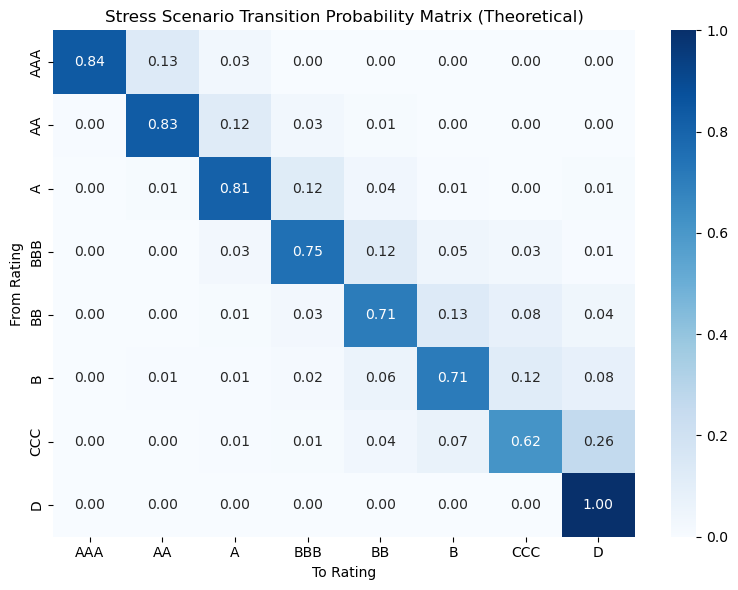

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(transition_probs_stress, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Stress Scenario Transition Probability Matrix (Theoretical)")
plt.xlabel("To Rating")
plt.ylabel("From Rating")
plt.tight_layout()
plt.show()

In [13]:
rating_df

,Company,Year_1,Year_2,Year_3,Year_4,Year_5,Year_6,Year_7,Year_8,Year_9,Year_10
0,C1,BBB,BBB,BBB,BBB,BBB,BBB,BBB,BB,BB,CCC
1,C2,B,B,B,B,D,D,D,D,D,D
2,C3,BB,D,D,D,D,D,D,D,D,D
3,C4,BBB,BBB,BBB,BB,BB,D,D,D,D,D
4,C5,A,A,A,A,A,BBB,BBB,BBB,BBB,BBB
...,...,...,...,...,...,...,...,...,...,...,...
495,C496,A,A,A,A,A,A,A,A,A,A
496,C497,BBB,BBB,BBB,B,B,D,D,D,D,D
497,C498,A,A,A,A,A,A,AAA,AAA,A,A
498,C499,CCC,CCC,D,D,D,D,D,D,D,D


In [14]:
rating_scale = {"AAA": 1, "AA": 2, "A": 3, "BBB": 4, "BB": 5, "B": 6, "CCC": 7, "D": 8}

def calculate_downgrade_rate(rating_df, rating_scale):
    rating_numeric = rating_df.drop(columns="Company").replace(rating_scale)
    downgrade_rates = []

    for t in range(rating_numeric.shape[1] - 1):
        current = rating_numeric.iloc[:, t]
        next_ = rating_numeric.iloc[:, t + 1]
        downgrade = (next_ > current).sum()
        rate = downgrade / len(rating_numeric)
        downgrade_rates.append(rate)

    return downgrade_rates

In [15]:
downgrade_rates_base = calculate_downgrade_rate(rating_df, rating_scale)
downgrade_rates_stress = calculate_downgrade_rate(rating_df_stress, rating_scale)
years = [f"Year {i+2}" for i in range(len(downgrade_rates_base))]

C:\Users\74596\AppData\Local\Temp\ipykernel_37652\1433942360.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rating_numeric = rating_df.drop(columns="Company").replace(rating_scale)
C:\Users\74596\AppData\Local\Temp\ipykernel_37652\1433942360.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rating_numeric = rating_df.drop(columns="Company").replace(rating_scale)


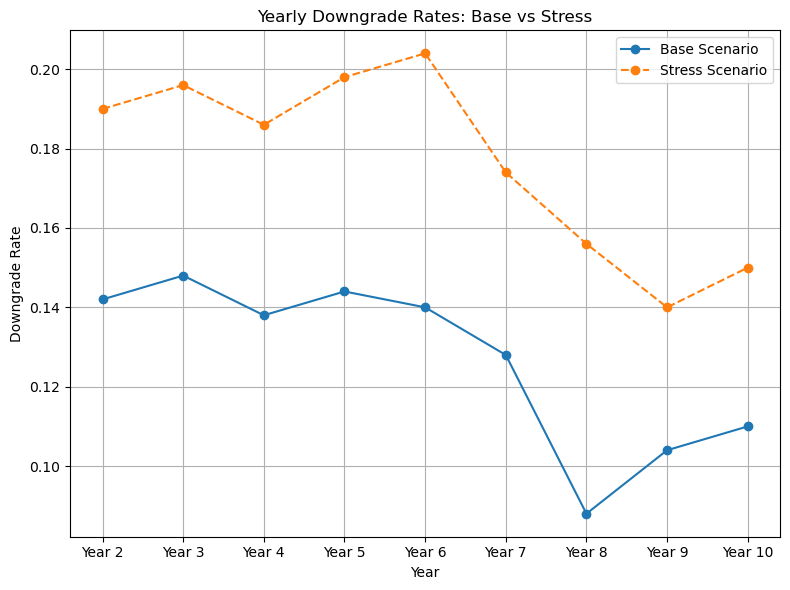

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(years, downgrade_rates_base, marker='o', label="Base Scenario", linestyle='-')
plt.plot(years, downgrade_rates_stress, marker='o', label="Stress Scenario", linestyle='--')
plt.title("Yearly Downgrade Rates: Base vs Stress")
plt.xlabel("Year")
plt.ylabel("Downgrade Rate")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

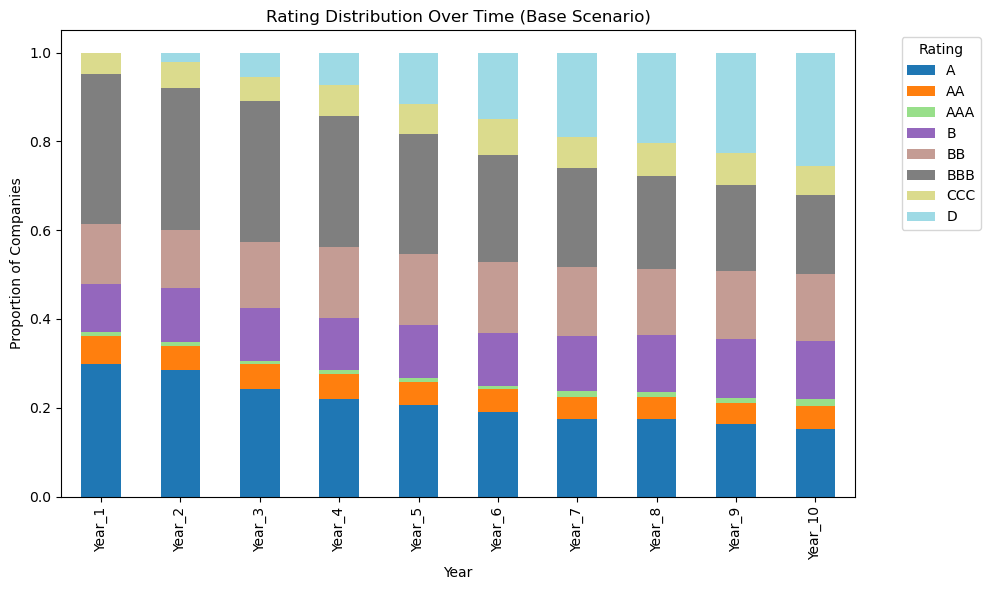

In [17]:
rating_base_counts_year= rating_df.drop(columns="Company").apply(lambda col: col.value_counts(normalize=True)).T.fillna(0)


rating_base_counts_year.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title("Rating Distribution Over Time (Base Scenario)")
plt.ylabel("Proportion of Companies")
plt.xlabel("Year")
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

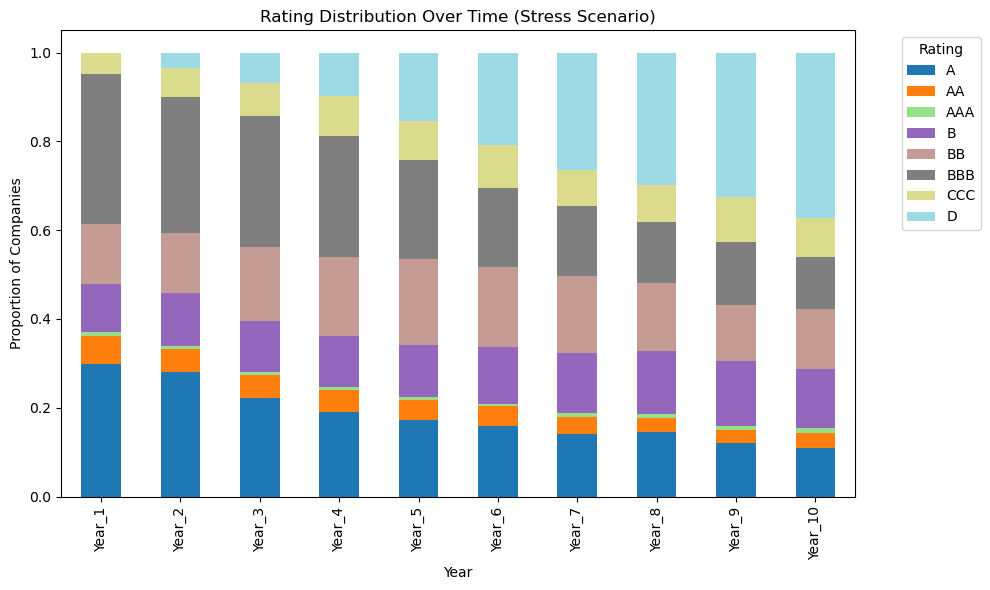

In [18]:
rating_stress_counts_year = rating_df_stress.drop(columns="Company").apply(lambda col: col.value_counts(normalize=True)).T.fillna(0)

rating_stress_counts_year.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title("Rating Distribution Over Time (Stress Scenario)")
plt.ylabel("Proportion of Companies")
plt.xlabel("Year")
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
##This calculation is for the new default to rating D
def calculate_default_rate(rating_df):
    default_rates = []
    years = rating_df.columns[1:]  # exclude "Company"
    for t in range(len(years) - 1):
        current = rating_df[years[t]]
        next_ = rating_df[years[t + 1]]
        new_defaults = ((current != "D") & (next_ == "D")).sum()
        rate = new_defaults / len(rating_df)
        default_rates.append(rate)
    return default_rates

In [20]:
##Total default share
def calculate_total_default_share(rating_df):
    total_defaults = []
    years = rating_df.columns[1:]  # exclude "Company"
    for year in years:
        defaults = (rating_df[year] == "D").sum()
        rate = defaults / len(rating_df)
        total_defaults.append(rate)
    return total_defaults

In [21]:
default_rates_base = calculate_default_rate(rating_df)
default_rates_stress = calculate_default_rate(rating_df_stress)
years = [f"Year {i+2}" for i in range(len(default_rates_base))]

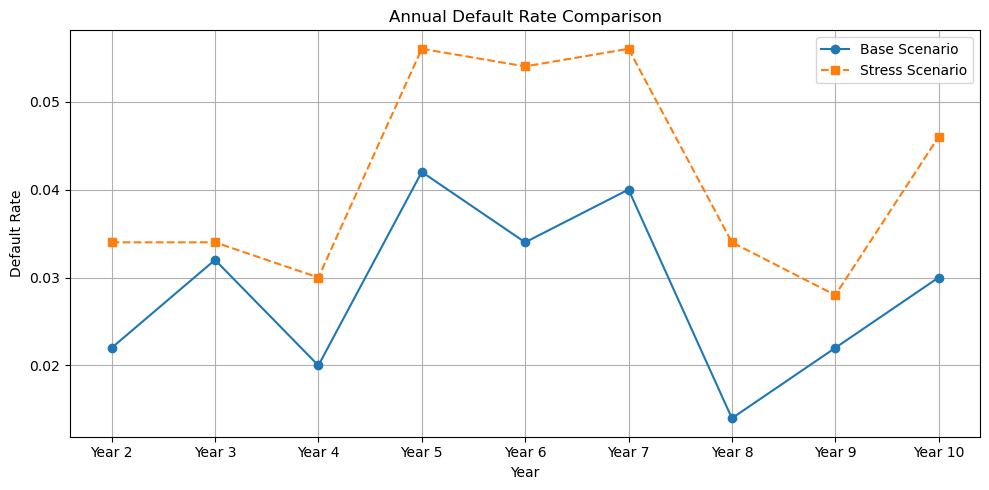

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(years, default_rates_base, marker='o', label='Base Scenario')
plt.plot(years, default_rates_stress, marker='s', linestyle='--', label='Stress Scenario')
plt.title("Annual Default Rate Comparison")
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
total_default_share_base = calculate_total_default_share(rating_df)
total_default_share_stress = calculate_total_default_share(rating_df_stress)

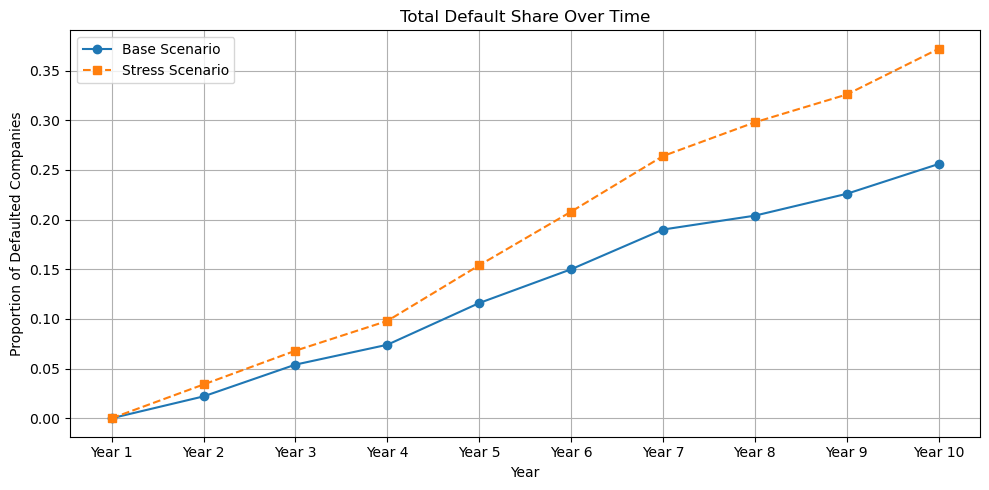

In [24]:
years = [f"Year {i+1}" for i in range(len(total_default_share_base))]

plt.figure(figsize=(10, 5))
plt.plot(years, total_default_share_base, marker='o', label='Base Scenario')
plt.plot(years, total_default_share_stress, marker='s', linestyle='--', label='Stress Scenario')
plt.title("Total Default Share Over Time")
plt.xlabel("Year")
plt.ylabel("Proportion of Defaulted Companies")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
EAD_per_company = 100
min_capital_requirement = 0.08
capital_conservation_buffer = 0.025
capital_ratio = min_capital_requirement + capital_conservation_buffer

rw_dict = {
    "AAA": 0.20,
    "AA": 0.20,
    "A":  0.50,
    "BBB": 1.00,
    "BB": 1.00,
    "B":  1.50,
    "CCC": 2.00,
    "D":  2.50
}

In [26]:
def calculate_capital_demand(rating_df, rw_dict, ead=100, capital_ratio=0.08):
    capital_by_year = []
    years = rating_df.columns[1:]  # exclude "Company"
    for year in years:
        rws = rating_df[year].map(rw_dict)
        total_capital = (ead * rws * capital_ratio).sum()
        capital_by_year.append(total_capital)
    return capital_by_year


In [27]:
capital_base = calculate_capital_demand(rating_df, rw_dict, EAD_per_company, capital_ratio)
capital_stress = calculate_capital_demand(rating_df_stress, rw_dict, EAD_per_company, capital_ratio)

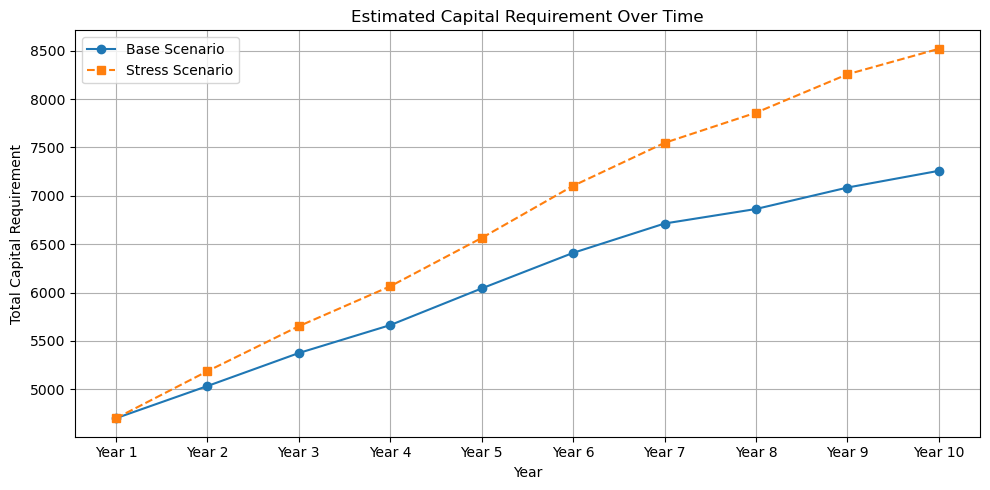

In [28]:
years = [f"Year {i+1}" for i in range(len(capital_base))]


plt.figure(figsize=(10, 5))
plt.plot(years, capital_base, marker='o', label='Base Scenario')
plt.plot(years, capital_stress, marker='s', linestyle='--', label='Stress Scenario')
plt.title("Estimated Capital Requirement Over Time")
plt.xlabel("Year")
plt.ylabel("Total Capital Requirement")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
rw_110 = {k: v * 1.10 for k, v in rw_dict.items()}
rw_120 = {k: v * 1.20 for k, v in rw_dict.items()}

In [30]:
capital_rw_base = calculate_capital_demand(rating_df, rw_dict, EAD_per_company, capital_ratio)
capital_rw_110 = calculate_capital_demand(rating_df, rw_110, EAD_per_company, capital_ratio)
capital_rw_120 = calculate_capital_demand(rating_df, rw_120, EAD_per_company, capital_ratio)


In [31]:
years = [f"Year {i+1}" for i in range(n_years)]

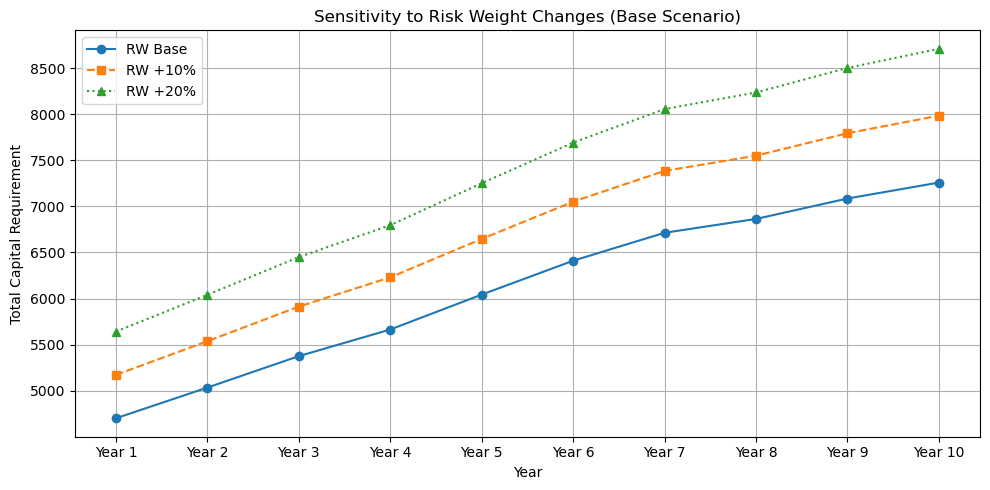

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(years, capital_rw_base, marker='o', label='RW Base')
plt.plot(years, capital_rw_110, marker='s', linestyle='--', label='RW +10%')
plt.plot(years, capital_rw_120, marker='^', linestyle=':', label='RW +20%')
plt.title("Sensitivity to Risk Weight Changes (Base Scenario)")
plt.xlabel("Year")
plt.ylabel("Total Capital Requirement")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()